In [178]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd


In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
df=pd.read_csv("https://raw.githubusercontent.com/EpistasisLab/tpot/master/tutorials/MAGIC%20Gamma%20Telescope/MAGIC%20Gamma%20Telescope%20Data.csv")

In [181]:
df.head()

,Flength,Fwidth,Fsize,Fconc,Fconc1,Fasym,Fm3long,Fm3trans,Falpha,Fdist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [182]:
df.size,df.shape

(209220, (19020, 11))

In [183]:
df.describe()

,Flength,Fwidth,Fsize,Fconc,Fconc1,Fasym,Fm3long,Fm3trans,Falpha,Fdist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
Flength     19020 non-null float64
Fwidth      19020 non-null float64
Fsize       19020 non-null float64
Fconc       19020 non-null float64
Fconc1      19020 non-null float64
Fasym       19020 non-null float64
Fm3long     19020 non-null float64
Fm3trans    19020 non-null float64
Falpha      19020 non-null float64
Fdist       19020 non-null float64
Class       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [185]:
df.isnull().sum()

Flength     0
Fwidth      0
Fsize       0
Fconc       0
Fconc1      0
Fasym       0
Fm3long     0
Fm3trans    0
Falpha      0
Fdist       0
Class       0
dtype: int64

## EDA

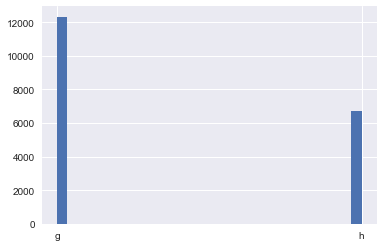

In [ ]:
plt.hist(x = 'Class', data = df, bins = 30)
sns.despine()

In [ ]:
sns.countplot(x = 'Flength', data = df)
sns.despine()

In [ ]:

sns.countplot(x = 'Fwidth', data = df)
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
df.Class.replace(['g', 'h'], [1, 0], inplace=True)
df

In [ ]:
sns.boxplot(x = 'Flength',data = df )
sns.despine()

In [ ]:
sns.countplot(x = 'Fconc', data = df)
sns.despine()

In [ ]:
plt.hist(x = 'Falpha',data=df)
sns.despine()

In [ ]:
sns.countplot(x = 'Falpha', data = df)
sns.despine()

In [ ]:
sns.countplot(x = 'Fm3long', data = df)
sns.despine()

In [ ]:
sns.distplot(df['Fconc1'])
sns.despine()



In [ ]:
plt.hist(x = 'Fdist', data =df)
sns.despine()

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
sns.regplot(x = 'Class',y = 'Flength',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2})
sns.despine()

In [ ]:
sns.regplot(x = 'Class',y='Fwidth',data = df , x_jitter=0.3, scatter_kws={'alpha':0.3}, color = 'red')
sns.despine()

In [ ]:
sns.regplot(x = 'Class',y = 'Fsize',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='pink')
sns.despine()

In [ ]:
sns.regplot(x = 'Class',y = 'Fdist',data = df , x_jitter=0.2, scatter_kws={'alpha':0.4},color='purple')
sns.despine()



In [ ]:
sns.regplot(x = 'Class',y = 'Fasym',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='red')
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Flength',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Fwidth',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Fsize',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Fconc',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Fconc1',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Fm3long',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Fm3long',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Falpha',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Fdist',data = df )
sns.despine()

In [ ]:
sns.boxplot(x = 'Class',y = 'Fdist',data = df )
sns.despine()

In [ ]:
sns.pairplot(df) 
sns.set(rc={'figure.figsize':(10,8)})

In [ ]:
y=df['Class']
del df['Class']
x = np.matrix(df)
x

In [ ]:
x.shape

## NORMALIZATION

In [ ]:
from sklearn import preprocessing
z = preprocessing.normalize(x)
z

In [ ]:
z1 = preprocessing.scale(z)
z1

In [ ]:

z1.shape

## FEATURE ENGINEERING

In [ ]:
from sklearn.feature_selection import VarianceThreshold
df_num=z1
selector = VarianceThreshold()
selector.fit_transform(df_num)

## IMPLEMENTING CLASSIFIER MODELS AND ALSO COMPARING DIFFERENT CLASSIFIERS USING AUC MEASURE¶ 

In [ ]:
model=GradientBoostingClassifier(n_estimators=30,random_state=7,verbose=1)
model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
x_train.shape,y_train.shape

In [ ]:
model.fit(x_train,y_train)

In [ ]:
filename='Gradient.sav'
import pickle
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
pred=model.predict(x_test)
pred

In [ ]:
Gradient=metrics.accuracy_score(pred,y_test)
Gradient

In [ ]:

print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
model1=BaggingClassifier(n_estimators=30,random_state=7,verbose=1)
model1

In [ ]:
model1.fit(x_train,y_train)

In [ ]:
pred1=model1.predict(x_test)
pred1

In [ ]:
filename='Bagging.sav'
pickle.dump(model1, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
print(classification_report(y_test,pred1))

In [ ]:
print(confusion_matrix(y_test,pred1))


In [ ]:
Bagging=metrics.accuracy_score(pred1,y_test)
Bagging

In [ ]:
model2=RandomForestClassifier(criterion='entropy',n_estimators=30,random_state=7,verbose=1)
model2.fit(x_train,y_train)

In [ ]:
filename='Random.sav'
pickle.dump(model2, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
pred2=model2.predict(x_test)
pred2


In [ ]:
Random=metrics.accuracy_score(pred2,y_test)
Random

In [ ]:
print(confusion_matrix(y_test,pred2))

In [ ]:
print(classification_report(y_test,pred2))

In [ ]:
list=[]
model4=LogisticRegression()
list.append(('logistics',model4))
model5=SVC()
list.append(('svm',model5))
model6=DecisionTreeClassifier()
list.append(('Decision',model6))
model7 = VotingClassifier(list).fit(x_train,y_train)
filename='Voting.sav'
pickle.dump(model7, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
pred3=model7.predict(x_test)
pred3

In [ ]:
voting=metrics.accuracy_score(pred3,y_test)
voting

In [ ]:

print(classification_report(y_test,pred3))

In [ ]:
print(confusion_matrix(y_test,pred3))

In [ ]:
from sklearn.metrics import auc
g=metrics.roc_auc_score(pred,y_test)
g

In [ ]:
b=metrics.roc_auc_score(pred1,y_test)
b

In [ ]:
r=metrics.roc_auc_score(pred2,y_test)
r

In [ ]:
v=metrics.roc_auc_score(pred3,y_test)
v

In [ ]:
a=['Gradient','Bagging','Random','voting']
b=[85,98,99,92]
plt.scatter(x=a,y=b)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('score in %')
plt.show()
sns.barplot(x=a,y=b)



In [ ]:
reg_lr = LogisticRegression(random_state=5)
reg_lr.fit(x_train,y_train)

In [ ]:
pred_lr=reg_lr.predict(x_test)
from sklearn import metrics
lr_acc=metrics.accuracy_score(pred_lr,y_test)
lr_acc

In [ ]:
logistic=metrics.roc_auc_score(pred_lr,y_test)
logistic

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(x_train,y_train)

In [ ]:
pred_KNN = model_KNN.predict(x_test)
knn=metrics.roc_auc_score(pred_KNN,y_test)
knn

In [ ]:
pred_KNN = model_KNN.predict(x_test)
knn=metrics.roc_auc_score(pred_KNN,y_test)
knn

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(x_train,y_train)

In [ ]:
pred_gnb = model_gnb.predict(x_test)
gnb_acc = metrics.accuracy_score(y_test,pred_gnb)
gnb_acc

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(x_tpred_gnb = model_gnb.predict(x_test)
gnb_acc = metrics.accuracy_score(y_test,pred_gnb)
gnb_accrain,y_train)

In [ ]:
pred_gnb = model_gnb.predict(x_test)
gnb_acc = metrics.accuracy_score(y_test,pred_gnb)
gnb_acc

nb=metrics.roc_auc_score(pred_gnb,y_test)
nb

In [ ]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(x_train,y_train)

In [ ]:
pred_svc = model_svc.predict(x_test)
svc_acc = metrics.accuracy_score(y_test,pred_svc)
svc_acc

In [ ]:
svc=metrics.roc_auc_score(pred_svc,y_test)
svc

## AUC MEASURE
## LOGISTIC REGRESSION=0.7785526942411563
## KNN=0.8301454146667996
## GaussianNB=0.7253998446054725 
## SVM=0.8075282885431401
## Accuracy reports of classifiers

## Gradient = 0.8429723098492815
## Bagging = 0.8715387311601822
## Random = 0.8724150017525412
## Voting = 0.7944269190325972


# According to AUC Measure Random Forest Classifier show the best score them others.
